<a href="https://colab.research.google.com/github/mustaphamerakech/supply-chain-cost-analysis/blob/5-added-visualizations-and-correlation-analysis-for-supply-chain-data/supply_chain_cost_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive', force_remount=True)


df = pd.read_csv('/content/drive/My Drive/supply-chain-cost-analysis/data.csv', encoding='utf-8')

Mounted at /content/drive


In [3]:
# Display first 5 rows
df.head(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
df.shape

(100, 24)

In [5]:
df.describe()


,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [6]:
df.isnull().sum()

,0
Product type,0
SKU,0
Price,0
Availability,0
Number of products sold,0
Revenue generated,0
Customer demographics,0
Stock levels,0
Lead times,0
Order quantities,0


In [15]:
# Summary of numerical data
print(df.describe())

# Summary of categorical data
print(df.describe(include=['object']))

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

In [14]:
# Summary of categorical data
df.describe(include=['object'])

,Product type,SKU,Customer demographics,Shipping carriers,Supplier name,Location,Inspection results,Transportation modes,Routes
count,100,100,100,100,100,100,100,100,100
unique,3,100,4,3,5,5,3,4,3
top,skincare,SKU0,Unknown,Carrier B,Supplier 1,Kolkata,Pending,Road,Route A
freq,40,1,31,43,27,25,41,29,43


In [7]:
# Group products by 'Product type' to analyze total revenue generated
product_revenue = df.groupby('Product type')['Revenue generated'].sum()
print("Revenue generated by each product type:")
print(product_revenue)

Revenue generated by each product type:
Product type
cosmetics    161521.265999
haircare     174455.390605
skincare     241628.162133
Name: Revenue generated, dtype: float64


In [8]:
transportation_costs = df.groupby('Transportation modes')['Costs'].sum()
print("Total transportation costs by mode:")
print(transportation_costs)

Total transportation costs by mode:
Transportation modes
Air     14604.527498
Rail    15168.931559
Road    16048.193639
Sea      7102.925520
Name: Costs, dtype: float64


In [9]:
# Analyze the relationship between lead times and defect rates
lead_time_vs_defect_rate = df.groupby('Lead times')['Defect rates'].mean()
print("Average defect rate by lead time:")
print(lead_time_vs_defect_rate)

# Identify products with high defect rates for quality improvement
high_defect_products = df[df['Defect rates'] > 3]
print("Products with high defect rates:")
print(high_defect_products[['SKU', 'Product type', 'Defect rates']])

# Analyze which routes incur the highest costs for optimization
route_costs = df.groupby('Routes')['Costs'].sum()
print("Total costs by routes:")
print(route_costs)

Average defect rate by lead time:
Lead times
1     1.927136
2     2.608267
3     3.145580
4     2.934916
5     1.990832
6     1.472080
7     2.379918
8     1.767053
9     1.498312
10    3.174131
11    3.528768
12    3.030996
13    2.806666
14    2.037352
15    0.732414
16    1.421542
17    2.440682
18    1.456798
19    2.830977
20    3.121669
22    1.552387
23    2.824546
24    2.836639
25    1.309761
26    2.322075
27    2.519466
28    3.055142
29    1.757380
30    3.507661
Name: Defect rates, dtype: float64
Products with high defect rates:
      SKU Product type  Defect rates
1    SKU1     skincare      4.854068
2    SKU2     haircare      4.580593
3    SKU3     skincare      4.746649
4    SKU4     skincare      3.145580
9    SKU9     skincare      3.844614
19  SKU19     skincare      3.646451
20  SKU20     skincare      4.231417
24  SKU24     haircare      3.691310
25  SKU25     haircare      3.797231
29  SKU29    cosmetics      3.878099
33  SKU33    cosmetics      3.541046
36  SKU3

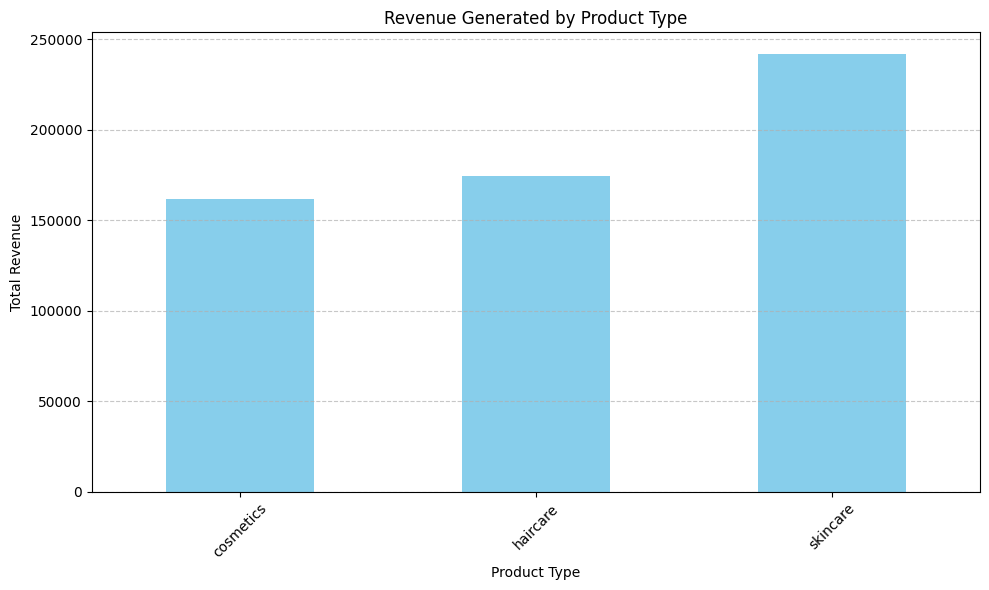

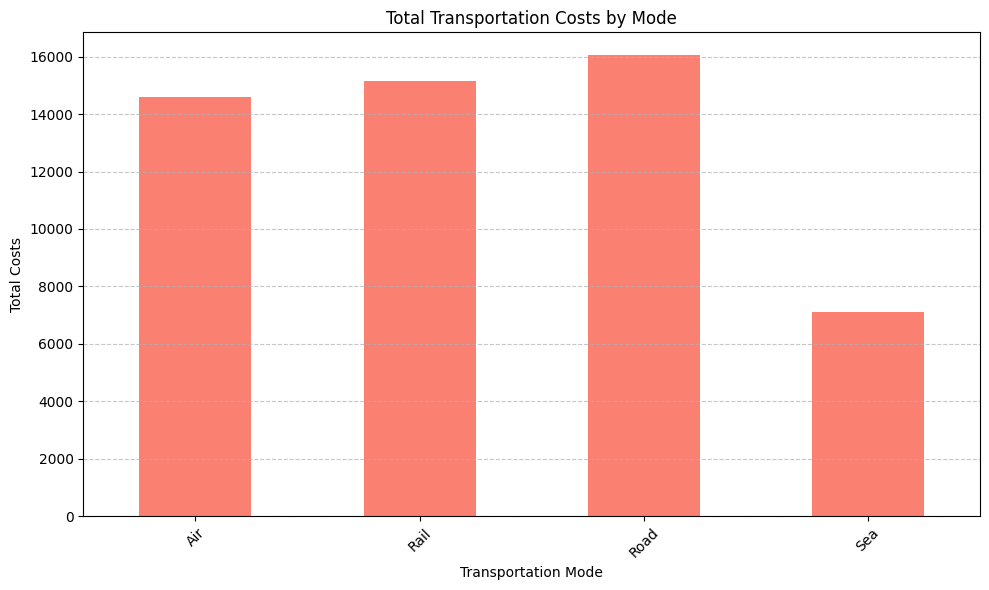

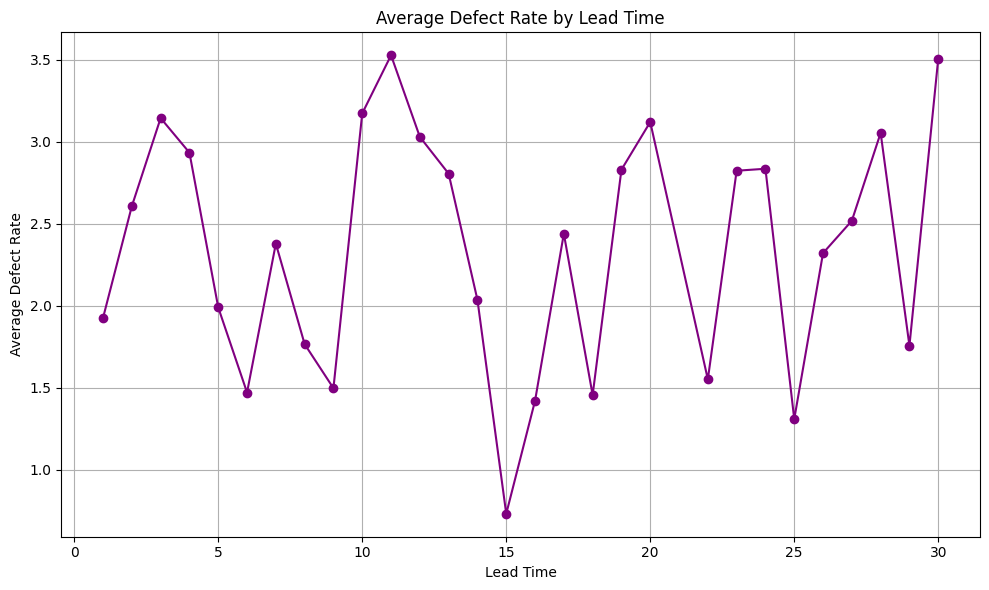

In [19]:
# Group products by 'Product type' to analyze total revenue generated
product_revenue = df.groupby('Product type')['Revenue generated'].sum()

# Analyze the total costs for different transportation modes to optimize logistics
transportation_costs = df.groupby('Transportation modes')['Costs'].sum()

# Analyze the relationship between lead times and defect rates
lead_time_vs_defect_rate = df.groupby('Lead times')['Defect rates'].mean()

# Analyze which routes incur the highest costs for optimization
route_costs = df.groupby('Routes')['Costs'].sum()

# Now we will create the plots using matplotlib

# Plotting revenue generated by each product type
plt.figure(figsize=(10, 6))
product_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue Generated by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting total transportation costs by mode
plt.figure(figsize=(10, 6))
transportation_costs.plot(kind='bar', color='salmon')
plt.title('Total Transportation Costs by Mode')
plt.xlabel('Transportation Mode')
plt.ylabel('Total Costs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting average defect rate by lead time
plt.figure(figsize=(10, 6))
lead_time_vs_defect_rate.plot(kind='line', marker='o', color='purple')
plt.title('Average Defect Rate by Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Average Defect Rate')
plt.grid()
plt.tight_layout()
plt.show()



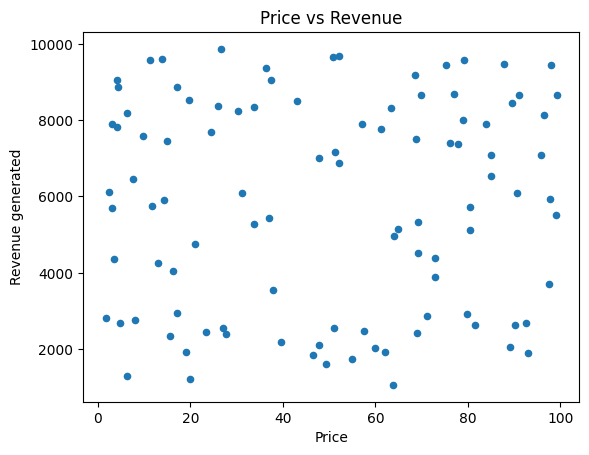

In [23]:
df.plot(kind='scatter', x='Price', y='Revenue generated', title='Price vs Revenue')
plt.show()


              Lead times  Stock levels
Lead times      1.000000      0.072571
Stock levels    0.072571      1.000000


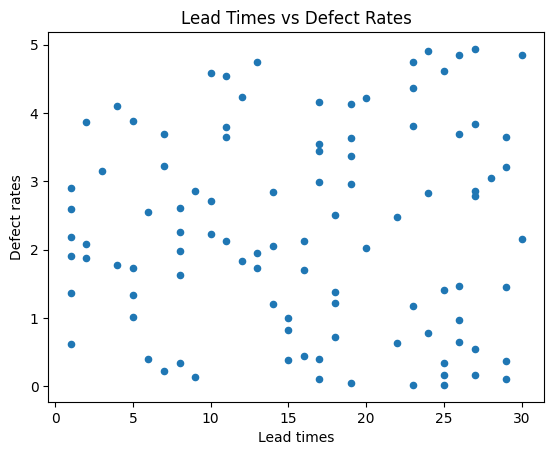

In [17]:
# Correlation between lead times and stock levels
print(df[['Lead times', 'Stock levels']].corr())

# Scatter plot for lead times vs defect rates
df.plot(kind='scatter', x='Lead times', y='Defect rates', title='Lead Times vs Defect Rates')
plt.show()


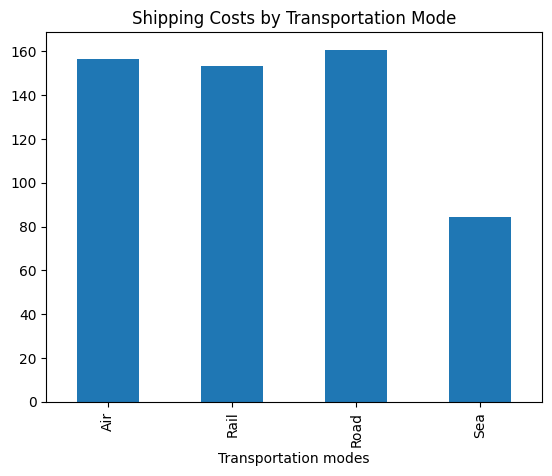

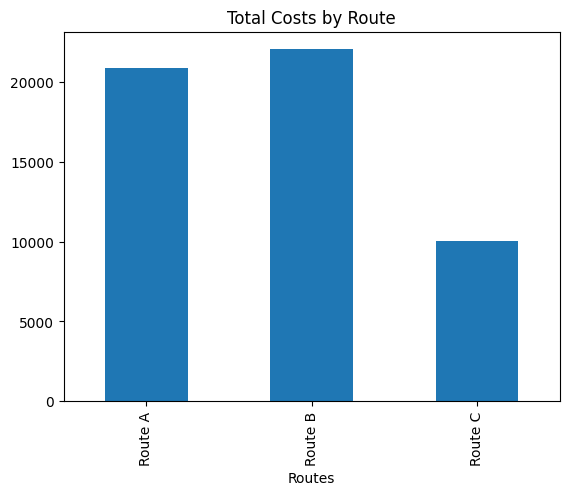

In [18]:
# Group by transportation mode and route for cost analysis
transportation_costs = df.groupby('Transportation modes')['Shipping costs'].sum()
transportation_costs.plot(kind='bar', title='Shipping Costs by Transportation Mode')
plt.show()

route_costs = df.groupby('Routes')['Costs'].sum()
route_costs.plot(kind='bar', title='Total Costs by Route')
plt.show()


In [20]:
# Identify products with defect rates > 3 for quality improvement
high_defect_products = df[df['Defect rates'] > 3]
print(high_defect_products[['SKU', 'Product type', 'Defect rates']])


      SKU Product type  Defect rates
1    SKU1     skincare      4.854068
2    SKU2     haircare      4.580593
3    SKU3     skincare      4.746649
4    SKU4     skincare      3.145580
9    SKU9     skincare      3.844614
19  SKU19     skincare      3.646451
20  SKU20     skincare      4.231417
24  SKU24     haircare      3.691310
25  SKU25     haircare      3.797231
29  SKU29    cosmetics      3.878099
33  SKU33    cosmetics      3.541046
36  SKU36     skincare      3.805533
40  SKU40     skincare      4.213269
42  SKU42     skincare      4.939255
45  SKU45     haircare      3.219605
46  SKU46     haircare      3.648611
50  SKU50    cosmetics      4.754801
55  SKU55     haircare      4.548920
61  SKU61     haircare      4.367471
63  SKU63     skincare      3.632843
65  SKU65     skincare      4.911096
66  SKU66     skincare      3.448063
72  SKU72    cosmetics      3.213330
73  SKU73    cosmetics      4.620546
77  SKU77     haircare      3.055142
78  SKU78     haircare      4.096881
8

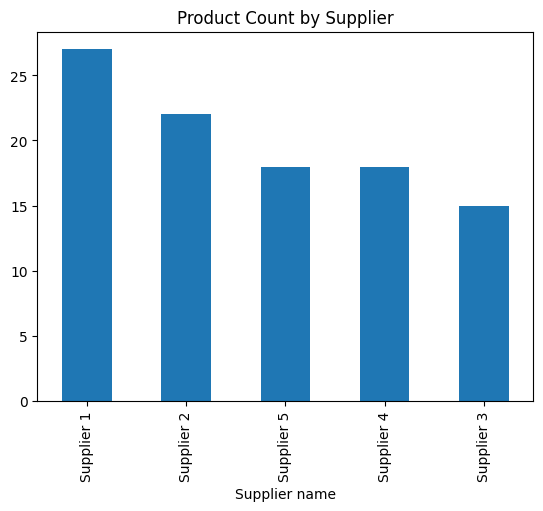

In [21]:
supplier_reliance = df['Supplier name'].value_counts()
supplier_reliance.plot(kind='bar', title='Product Count by Supplier')
plt.show()
